In [1]:
import warnings
warnings.simplefilter("ignore")
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
%matplotlib inline

In [2]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()
train_X.shape

(60000, 28, 28)

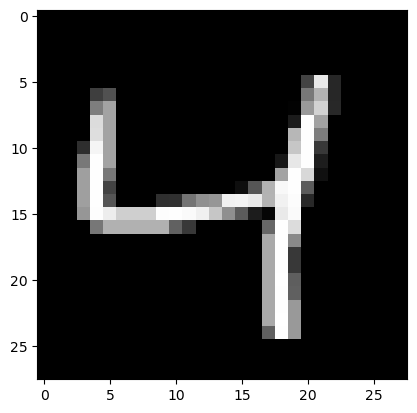

In [3]:
plt.imshow(train_X[2],cmap='gray')

In [4]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)

train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')

train_X = train_X/255
test_X  = test_X/255

from keras.utils import np_utils 
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

In [6]:
train_y[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
input_shape=(28,28,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [8]:
batch_size=32
epochs=10

plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

loss,accuracy = model.evaluate(test_X,test_y,verbose=0)

print('Test loss- ',str(round(loss*100,2)) +str('%'))
print('Test accuracy- ',str(round(accuracy*100,2)) +str('%'))

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.7628 - accuracy: 0.7539 - val_loss: 0.1755 - val_accuracy: 0.9492
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2554 - accuracy: 0.9226 - val_loss: 0.1125 - val_accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1872 - accuracy: 0.9442 - val_loss: 0.0854 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1543 - accuracy: 0.9535 - val_loss: 0.0691 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1350 - accuracy: 0.9596 - val_loss: 0.0600 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1201 - accuracy: 0.9639 - val_loss: 0.0565 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1109 - accuracy: 0.9666 - val_loss: 0.0489 -

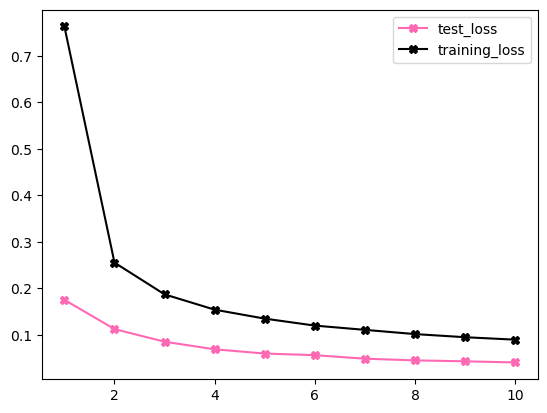

In [9]:
plotting_data_dict = plotting_data.history

test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']

epochs = range(1,len(test_loss)+1)

plt.plot(epochs,test_loss,marker='X',label='test_loss',color='hotpink')
plt.plot(epochs,training_loss,marker='X',label='training_loss',color='black')
plt.legend()

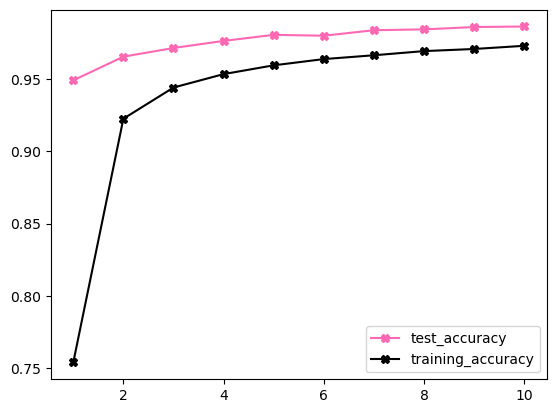

In [10]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy',color='hotpink')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy',color='black')
plt.legend()

In [11]:
model.save('MNIST_10_epochs.h5')
print('Model Saved')

Model Saved


In [12]:
classifier = tf.keras.models.load_model('MNIST_10_epochs.h5')

In [ ]:
drawing = False
cv2.namedWindow('win')
black_image = np.zeros((256, 256, 3), np.uint8)
ix, iy = -1, -1

def draw_circles(event, x, y, flags, param):
    global ix, iy, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(black_image, (x, y), 5, (255, 255, 255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.setMouseCallback('win', draw_circles)

while True:
    cv2.imshow('win', black_image)
    key = cv2.waitKey(1)
    
    if key == 27:  # ESC key to exit
        break
    elif key == 13:  # Enter key to recognize the drawn digit
        input_img = cv2.cvtColor(black_image, cv2.COLOR_BGR2GRAY)
        input_img = cv2.resize(input_img, (28, 28))
        input_img = np.expand_dims(input_img, axis=0)
        input_img = np.expand_dims(input_img, axis=-1)
        input_img = input_img.astype('float32')
        input_img /= 255.0

        res = classifier.predict(input_img)[0]
        cv2.putText(black_image, text=str(res), org=(205, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1, color=(255, 255, 255), thickness=2)
    elif key == ord('c'):  # 'c' key to clear the drawing
        black_image = np.zeros((256, 256, 3), np.uint8)
        ix, iy = -1, -1

cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step
